<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [2.4 Model Identification for the Temperature Control Lab](https://jckantor.github.io/cbe30338-2021/02.04-Model-Identification.html) | [Contents](toc.html) | [3.0 Feedback Control](https://jckantor.github.io/cbe30338-2021/03.00-Feedback-Control.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/02.05-State-Space-Models.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/02.05-State-Space-Models.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 2.5 State-Space Models


### 2.5.1 Standard form

\begin{align}
\frac{dT_{H,1}}{dt} & = -(\frac{U_a+U_b+U_c}{C^H_p})T_{H,1} + \frac{U_b}{C^H_p}T_{S,1} + \frac{U_c}{C^H_p}T_{H,2}  + \frac{\alpha P_1}{C^H_p}u_1 + \frac{U_a}{C^H_p}T_{amb}\\
\frac{dT_{S,1}}{dt} & = \frac{U_b}{C^S_p}(T_{H,1} - T_{S,1})  \\
\frac{dT_{H,2}}{dt} & = -(\frac{U_a+U_b+U_c}{C^H_p})T_{H,2} + \frac{U_b}{C^H_p}T_{S,2} + \frac{U_c}{C^H_p}T_{H,1}  + \frac{\alpha P_2}{C^H_p}u_2 + \frac{U_a}{C^H_p}T_{amb}\\
\frac{dT_{S,2}}{dt} & = \frac{U_b}{C^S_p}(T_{H,2} - T_{S,2}) 
\end{align}

where

\begin{align}
T_1 & = T_{S,1} \\
T_2 & = T_{S,2}
\end{align}

## 2.5.1 Comparing experimental data to model predictions

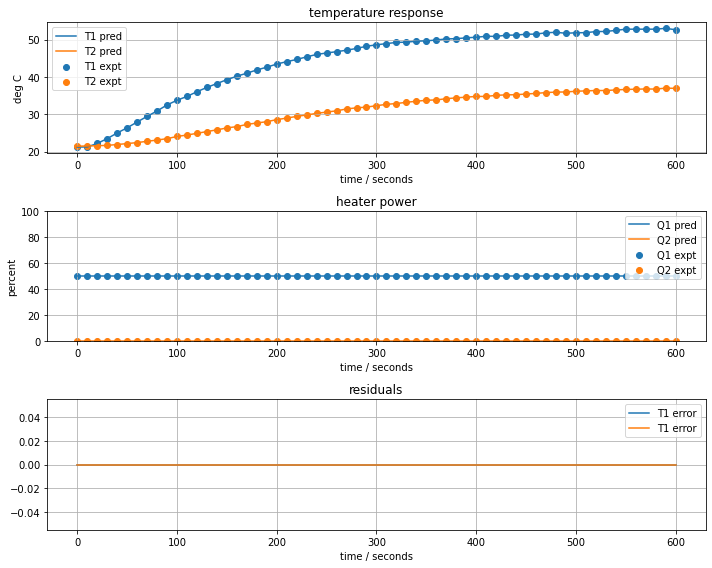

In [2]:
# create a function to compare two data sets
def plot_data(expt, pred):
    t_expt = expt.index
    
    # create a 3 x 1 grid of plot axes
    fig, ax = plt.subplots(3, 1, figsize=(10,8))
    
    # first plot axes
    ax[0].scatter(t_expt, expt["T1"], label="T1 expt")
    ax[0].scatter(t_expt, expt["T2"], label="T2 expt")
    ax[0].plot(t_expt, pred["T1"], label="T1 pred")
    ax[0].plot(t_expt, pred["T2"], label="T2 pred")
    ax[0].set_ylabel("deg C")
    ax[0].set_title("temperature response")

    # second plot axes
    ax[1].scatter(t_expt, expt["Q1"], label="Q1 expt")
    ax[1].scatter(t_expt, expt["Q2"], label="Q2 expt")
    ax[1].plot(t_expt, pred["Q1"], label="Q1 pred")
    ax[1].plot(t_expt, pred["Q2"], label="Q2 pred")
    ax[1].set_ylim([0, 100])
    ax[1].set_ylabel("percent")
    ax[1].set_title("heater power")
    
    # third plot axes
    ax[2].plot(t_expt, pred["T1"]-expt["T1"], label="T1 error")
    ax[2].plot(t_expt, pred["T2"]-expt["T2"], label="T1 error")
    ax[2].set_title("residuals")
    
    # things to do for every plot axes
    for a in ax:
        a.grid(True)
        a.set_xlabel("time / seconds")
        a.legend()
        
    plt.tight_layout()
    
    return
    
# demonstrate by comparing experimental data to itself
plot_data(expt, expt);

## 2.5.2 Linear State Space models

As you can see, models quickly become cumbersome to formulate as we attempt to incorporate more detail. This version of a model Temperature Control Lab model application involves four states, two manipulable inputs, one disturbance $T_{amb}$. 

\begin{align}
\frac{d}{dt}\underbrace{\left[\begin{array}{c} T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2} \end{array}\right]}_x
& = 
\underbrace{\left[\begin{array}{cccc}
-(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} & \frac{U_c}{C^H_p} & 0 \\
\frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p} & 0 & 0 \\
\frac{U_c}{C^H_p} & 0 & -(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} \\
0 & 0 & \frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p}
\end{array}\right]}_A
\underbrace{\left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]}_x
+
\underbrace{\left[\begin{array}{cc}\frac{\alpha P_1}{C_p} & 0 \\ 0 & 0 \\ 0 & \frac{\alpha P_2}{C_p} \\ 0 & 0 \end{array}\right]}_{B_u}
\underbrace{\left[\begin{array}{c}u_1 \\ u_2\end{array}\right]}_u
+
\underbrace{\left[\begin{array}{c}\frac{U_a}{C^H_p} \\ 0 \\ \frac{U_a}{C^H_p} \\ 0 \end{array}\right]}_{B_d}
\underbrace{\left[\begin{array}{c}T_{amb}\end{array}\right]}_{d}
\end{align}

\begin{align}
\underbrace{\left[\begin{array}{c} T_1 \\ T_2 \end{array}\right]}_y
& = 
\underbrace{\left[\begin{array}{cccc} 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{array}\right]}_C
\underbrace{\left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]}_x
\end{align}

\begin{align}
\frac{dx}{dt} & = A x + B_u u + B_d d \\
y & = C x
\end{align}

where

$$x = \left[\begin{array}{c}T_{H,1} \\ T_{S,1} \\ T_{H,2} \\ T_{S,2}\end{array}\right]
\qquad
u = \left[\begin{array}{c}u_1 \\ u_2\end{array}\right]
\qquad
d = \left[\begin{array}{c}T_{amb}\end{array}\right]
\qquad
y = \left[\begin{array}{c} T_1 \\ T_2 \end{array}\right]
$$

$$
A = \left[\begin{array}{cccc}
-(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} & \frac{U_c}{C^H_p} & 0 \\
\frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p} & 0 & 0 \\
\frac{U_c}{C^H_p} & 0 & -(\frac{U_a+U_b+U_c}{C^H_p}) & \frac{U_b}{C^H_p} \\
0 & 0 & \frac{U_b}{C^S_p} & -\frac{U_b}{C^S_p}
\end{array}\right]
\qquad
B_u = \left[\begin{array}{cc}\frac{\alpha P_1}{C_p} & 0 \\ 0 & 0 \\ 0 & \frac{\alpha P_2}{C_p} \\ 0 & 0 \end{array}\right]
\qquad
B_d  = \left[\begin{array}{c}\frac{U_a}{C^H_p} \\ 0 \\ \frac{U_a}{C^H_p} \\ 0 \end{array}\right]
\qquad
C = \left[\begin{array}{cccc} 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{array}\right]
$$

array([-2.21000000e-01,  1.03906650e-01,  6.95540055e-02,  1.87161412e-02,
       -7.38793423e-02,  6.39240553e-02,  7.67747890e-02,  9.67853981e-02,
        1.31610343e-01, -4.65187237e-02,  6.07975156e-02,  3.13854576e-01,
        2.56691111e-01,  2.22626630e-01,  2.49812158e-01,  2.10313685e-01,
        2.01112160e-01,  2.49966665e-01,  1.74755406e-01,  1.76187869e-01,
        3.38813031e-02,  4.16285988e-02,  7.33982911e-02, -6.46654410e-02,
       -1.80012819e-01, -7.70428323e-02,  2.63654409e-02,  6.86411068e-02,
       -9.71925693e-03, -2.08151601e-01, -2.32024402e-01, -2.12638669e-01,
       -2.12227935e-01,  2.50417363e-02,  4.50717550e-02,  2.00961469e-01,
        2.08362655e-01,  1.36818632e-01,  2.80668581e-01,  2.58339884e-01,
        2.94271619e-01,  2.30927959e-01,  4.50609496e-01,  3.07249177e-01,
        4.39212047e-01,  3.59295248e-01,  4.48600884e-01,  2.02148973e-01,
        1.76835308e-01,  5.38696987e-01,  5.16340159e-01,  5.93940023e-01,
        4.14240830e-01,  

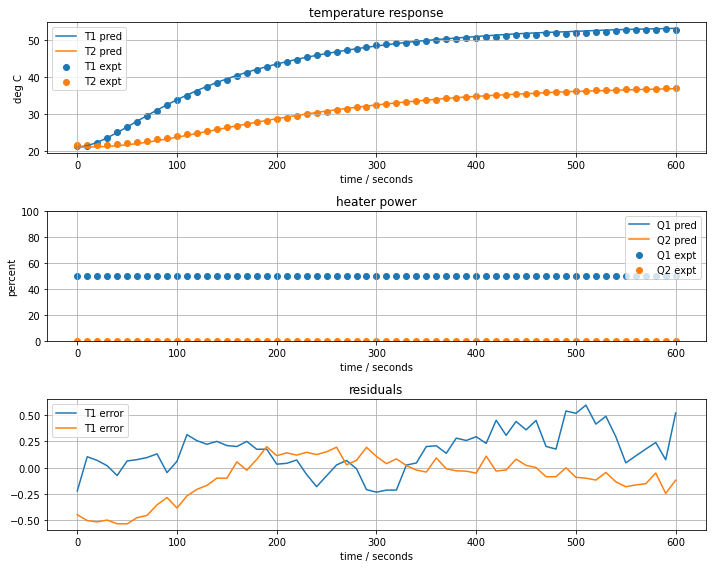

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# known parameters
alpha = 0.00016
P1 = 200
P2 = 100
T_amb = 21.0
t_expt = np.linspace(0, 600)

def u1(t):
    return np.interp(t, t_expt, expt["Q1"])
    
def u2(t):
    return np.interp(t, t_expt, expt["Q2"])

# fitted parameters
CpH = 4.5                # joules/deg C
CpS = 0.82                # joules/deg C
Ua = 0.032              # watts/deg C
Ub = 0.019              # watts/deg C
Uc = 0.033              # watts/deg C


def model_state_space(param, plot=False):
    # unpack the adjustable parameters
    CpH, CpS, Ua, Ub, Uc = param  
    
    A = np.array([
        [-(Ua + Ub + Uc)/CpH, Ub/CpH, Uc/CpH, 0],
        [Ub/CpS, -Ub/CpS, 0, 0],
        [Uc/CpH, 0, -(Ua + Ub + Uc)/CpH, Ub/CpH],
        [0, 0, Ub/CpS, -Ub/CpS]
    ])
    Bu = np.array([
        [alpha*P1/CpH, 0],
        [0, 0],
        [0, alpha*P2/CpH],
        [0, 0]
    ])
    Bd = np.array([[Ua/CpH], [0], [Ua/CpH], [0]])
    C = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])
    
    # model solution
    def deriv(t, y):
        u = np.array([u1(t), u2(t)])
        d = np.array([T_amb])
        return np.dot(A, y) + np.dot(Bu, u) + np.dot(Bd, d)

    soln = solve_ivp(deriv, [min(t_expt), max(t_expt)], [T_amb]*4, t_eval=t_expt) 
    
    # create dataframe with predictions
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt)
    pred["T1"] = soln.y[1]
    pred["T2"] = soln.y[3]
    
    # plot solution
    if plot:
        ax = plot_data(expt, pred)
    
    err1 = np.array(pred["T1"] - expt["T1"])
    err2 = np.array(pred["T2"] - expt["T2"])
    
    return np.concatenate((err1, err2))
    
model_state_space([CpH, CpS, Ua, Ub, Uc], plot=True)

CpH = 4.464228867544677,  CpS = 0.8190568692182345,   Ua = 0.03222673704455933,  Ub = 0.01862441998037804,  Uc = 0.03355402673859839


array([-0.221     ,  0.10032862,  0.05751971, -0.00405288, -0.10773535,
        0.01920499,  0.02181558,  0.03268158,  0.05933982, -0.12621633,
       -0.02560722,  0.22155609,  0.15911112,  0.12013916,  0.14267501,
        0.09875219,  0.08540296,  0.13037179,  0.05135958,  0.04902977,
       -0.09703032, -0.09303508, -0.06500056, -0.20674452, -0.32566311,
       -0.22615389, -0.12616067, -0.08732048, -0.16917903, -0.37119074,
       -0.39871871, -0.38303475, -0.38631935, -0.15266169, -0.13605967,
        0.01670969,  0.0212302 , -0.0531472 ,  0.08779111,  0.06239909,
        0.09510899,  0.02842882,  0.24477308,  0.09824595,  0.2274442 ,
        0.14545714,  0.2330263 , -0.01549226, -0.04315254,  0.31607597,
        0.29086055,  0.36550521,  0.18295068,  0.25477444,  0.05819072,
       -0.19055665, -0.1262414 , -0.06348922, -0.00238694, -0.16838666,
        0.27369427, -0.446     , -0.50119115, -0.51353842, -0.49453398,
       -0.52704165, -0.52493019, -0.46191517, -0.43668868, -0.33

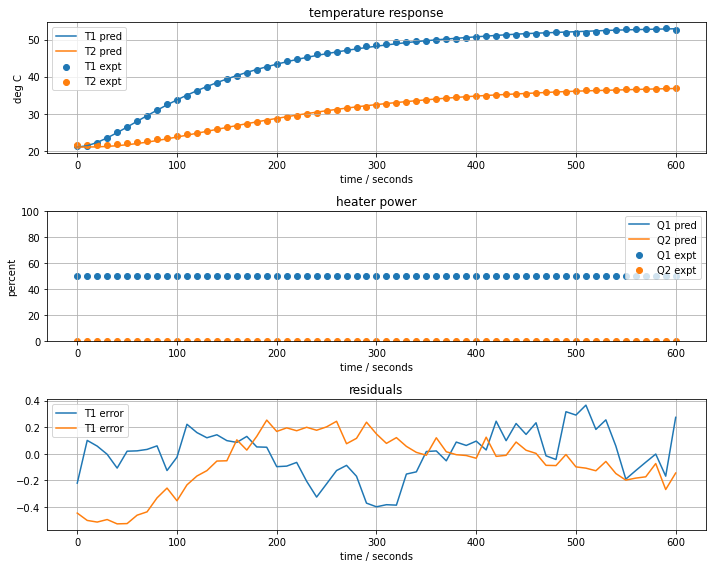

In [496]:
results = least_squares(model_state_space,  [CpH, CpS, Ua, Ub, Uc])
CpH, CpS, Ua, Ub, Uc = results.x
print(f"CpH = {CpH},  CpS = {CpS},   Ua = {Ua},  Ub = {Ub},  Uc = {Uc}")
model_state_space(results.x, True)

<!--NAVIGATION-->
< [2.4 Model Identification for the Temperature Control Lab](https://jckantor.github.io/cbe30338-2021/02.04-Model-Identification.html) | [Contents](toc.html) | [3.0 Feedback Control](https://jckantor.github.io/cbe30338-2021/03.00-Feedback-Control.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/02.05-State-Space-Models.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/02.05-State-Space-Models.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>